In [1]:
import json
# Load the dictionary containing filenames and titles from the JSON file
with open('data_final_stopword_lemma.json', 'r') as json_file:
    data = json.load(json_file)
# Extract titles from the dictionary

In [6]:
import os
# Path to the folder containing .txt files
pdf_path = '/media/sau/TRAVAIL/ubuntu-proj/Articles/'

import re

# Function to extract the latest year from folder names
def extract_latest_year(folder_name):
    years = re.findall(r"_?(\d{4})_?", folder_name)
    if years:
        return max(map(int, years))
    else:
        return None
    
file_year_dict_list = []

folder_path = pdf_path

for filename in os.listdir(folder_path):
    if filename.endswith(".pdf"):
        year = extract_latest_year(filename)
#         file_year_dict[filename] = year

        file_year_dict_list.append({
            "Title": filename,
            "PublishedYear": year
        })

# sorted_by_year = dict(sorted(file_year_dict.items(), key=lambda item: item[1]))


# Sort the list of dictionaries by the 'year' key
sorted_filename_year = sorted(file_year_dict_list, key=lambda x: x['PublishedYear'])

# Print titles sorted by year
for entry in sorted_filename_year:
    print(entry['PublishedYear'], "-", entry['Title'])
    
import pandas as pd
# Create a DataFrame
df_filename = pd.DataFrame(sorted_filename_year)

# Specify the CSV file path and name
csv_file_path = 'sorted_filename_year.csv'  # Change the file path and name as needed

# Export the DataFrame to CSV
df_filename.to_csv(csv_file_path, index=False)  # Set index=False to exclude row numbers in the CSV file


1883 - membres-de-la-société-au-31-mars-1883_1883_trimestre_1.pdf
1883 - procès-verbaux-des-séances_1883_trimestre_3&4.pdf
1883 - rapport-de-la-commission-chargée-d-examiner-le-projet-de-création-d-un-musée-commercial-à-saigon_1883_trimestre_3&4.pdf
1883 - rapport-sur-le-régime-forestier-de-la-cochinchine_1883_trimestre_3&4.pdf
1883 - rapport-sur-un-essai-d-amélioration-de-la-vigne-de-cochinchine-1882_1883_trimestre_1.pdf
1883 - essai-d-un-échantillon-de-rocou-de-cochinchine_1883_trimestre_3&4.pdf
1883 - compte-rendu-sur-les-courants-terrestres_1883_trimestre_3&4.pdf
1883 - note-sur-quelques-espèces-de-poissons-des-montagnes-de-samrong-tong-cambodge_1883_trimestre_3&4.pdf
1883 - procès-verbaux-des-réunions-de-janvier-1882-à-mars-1883_1883_trimestre_1.pdf
1883 - rapport-présenté-par-m-girard-sur-les-cultures-essayées-par-lui-dans-l-île-de-phu-quoc_1883_trimestre_2.pdf
1883 - statuts-de-la-société_1883_trimestre_1.pdf
1883 - traduction-du-ceylon-observer-sur-la-culture-du-poivre-dans-l-i

In [7]:

# Sort the list of dictionaries by the 'year' key
sorted_data_len = sorted(data, key=lambda x: x['Words'])

# Print titles sorted by year
for entry in sorted_data_len:
    print(entry['Words'], "-", entry['Title'])
    
import pandas as pd
# Create a DataFrame
df_data_len = pd.DataFrame(sorted_data_len)

# Specify the CSV file path and name
csv_file_path = 'sorted_data_len.csv'  # Change the file path and name as needed

# Export the DataFrame to CSV
df_filename.to_csv(csv_file_path, index=False)  # Set index=False to exclude row numbers in the CSV file


38 - clichés efeo
39 - bureau société etudes indochinoises
39 - formule
40 - bureau société etudes indochinoises
41 - bureau société etudes indochinoises
41 - bureau société etudes indochinoises
42 - bureau société etudes indochinoises
42 - bureau société etudes indochinoises
45 - bureau société etudes indochinoises
47 - bureau société etudes indochinoises
47 - bureau société etudes indochinoises
48 - bureau société etudes indochinoises
51 - bureau société etudes indochinoises
52 - bibliographie nouvelles recherches archéologiques begram
61 - bureau société etudes indochinoises
65 - ruines angkor
66 - société etudes indochinoises composition bureau
73 - renseignements divers
91 - publications société etudes indochinoises
105 - bibliographie
109 - sociétés correspondantes
109 - complément étude recréations intellectuelles sou tong tchou hi bsei
110 - nécrologie louis bo
110 - découvertes
124 - rapport essai amélioration vigne cochinchine trimestre
127 - projet modification statuts adopt

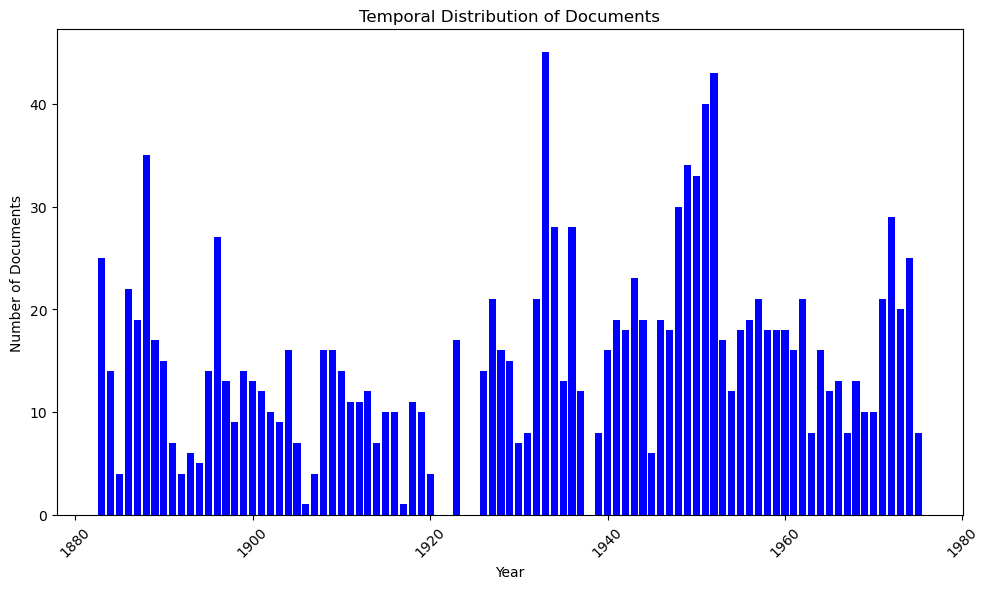

In [8]:
import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

year_pattern = re.compile(r'(18[5-9]\d|19[0-9]\d)')
year_publications = defaultdict(int)

folder_path = pdf_path

for filename in os.listdir(folder_path):
    if filename.endswith(".pdf"):
        year = extract_latest_year(filename)
        if year:
            year_publications[year] += 1
        else:
             print("not found year ")       

# Sort the dictionary by years
sorted_year_publications = dict(sorted(year_publications.items()))

years = list(sorted_year_publications.keys())
publication_counts = list(sorted_year_publications.values())

plt.figure(figsize=(10, 6))
plt.bar(years, publication_counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Documents')
plt.title('Temporal Distribution of Documents')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

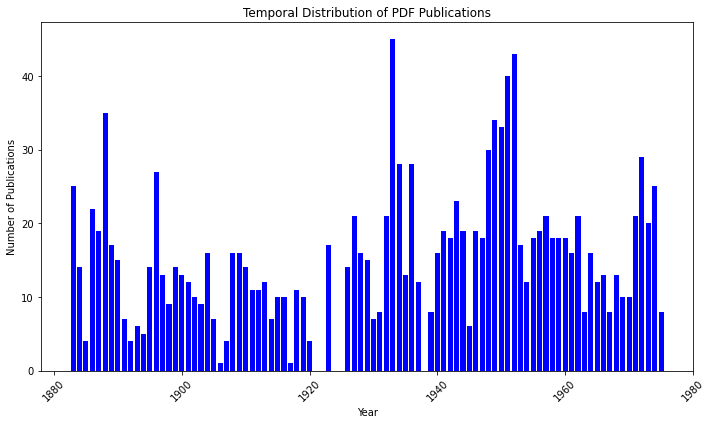

In [6]:
#  code which select the latest year in filename
import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

year_pattern = re.compile(r'(18[5-9]\d|19[0-9]\d)')  # Updated pattern without word boundaries
year_publications = defaultdict(int)

folder_path = pdf_path
full_corpus = []

for filename in os.listdir(folder_path):
    if filename.endswith(".pdf"):
        years = re.findall(year_pattern, filename)
        if years:
            latest_year = max(map(int, years))
            full_corpus += filename
            if 1850 < latest_year < 2000:
                year_publications[latest_year] += 1

# Sort the dictionary by years
sorted_year_publications = dict(sorted(year_publications.items()))

years = list(sorted_year_publications.keys())
publication_counts = list(sorted_year_publications.values())

plt.figure(figsize=(10, 6))
plt.bar(years, publication_counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Temporal Distribution of PDF Publications')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [14]:
preprocessed_title=[]
for doc in data:
    preprocessed_title.append(doc["Title"])

i=0

all_title_text=" ".join(preprocessed_title)
                                  
words = nltk.word_tokenize(all_title_text)

In [16]:
import nltk
nltk.download('punkt')
from nltk.util import ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

from nltk import FreqDist

words_for_ngrams = words

# Create bigrams (pairs of consecutive words)
bigrams = list(ngrams(words_for_ngrams, 2))

# Find collocations (frequently occurring bigrams)
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words)
collocations = finder.nbest(bigram_measures.likelihood_ratio, 15)


# Create a frequency distribution of bigrams
bigram_freq = FreqDist(bigrams)

# Print the frequency of each bigram
for bigram, freq in bigram_freq.most_common(20):
    print(f"{bigram}: {freq} times")

# print("\nCollocations:")
# for collocation in collocations:
#     print(collocation)


('etudes', 'indochinoises'): 89 times
('société', 'etudes'): 88 times
('procès', 'verbaux'): 55 times
('actes', 'société'): 45 times
('société', 'actes'): 39 times
('membres', 'société'): 35 times
('viet', 'nam'): 33 times
('indochinoises', 'liste'): 28 times
('verbaux', 'séances'): 27 times
('séances', 'procès'): 25 times
('liste', 'membres'): 22 times
('bibliographie', 'bibliographie'): 19 times
('liste', 'générale'): 15 times
('générale', 'membres'): 15 times
('publications', 'société'): 15 times
('bureau', 'société'): 13 times
('indochinoises', 'publications'): 12 times
('articles', 'récents'): 11 times
('récents', 'asie'): 11 times
('asie', 'sud'): 11 times


[nltk_data] Downloading package punkt to /home/sau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:

from nltk.util import ngrams

words_for_ngrams= words
# Create trigrams
trigrams = list(ngrams(words_for_ngrams, 3))

# Count the frequency of each trigram
trigram_counts = Counter(trigrams)

# Print the most common trigrams
most_common_trigrams = trigram_counts.most_common(20)  # Change 10 to the desired number
for trigram, count in most_common_trigrams:
    print(trigram, "-", count)


('société', 'etudes', 'indochinoises') - 88
('actes', 'société', 'actes') - 39
('société', 'actes', 'société') - 39
('membres', 'société', 'etudes') - 32
('etudes', 'indochinoises', 'liste') - 28
('procès', 'verbaux', 'séances') - 27
('verbaux', 'séances', 'procès') - 25
('séances', 'procès', 'verbaux') - 25
('liste', 'membres', 'société') - 18
('bibliographie', 'bibliographie', 'bibliographie') - 15
('indochinoises', 'liste', 'membres') - 15
('liste', 'générale', 'membres') - 15
('générale', 'membres', 'société') - 15
('publications', 'société', 'etudes') - 15
('bureau', 'société', 'etudes') - 13
('indochinoises', 'liste', 'générale') - 12
('etudes', 'indochinoises', 'publications') - 12
('articles', 'récents', 'asie') - 11
('récents', 'asie', 'sud') - 11
('indochinoises', 'publications', 'société') - 10


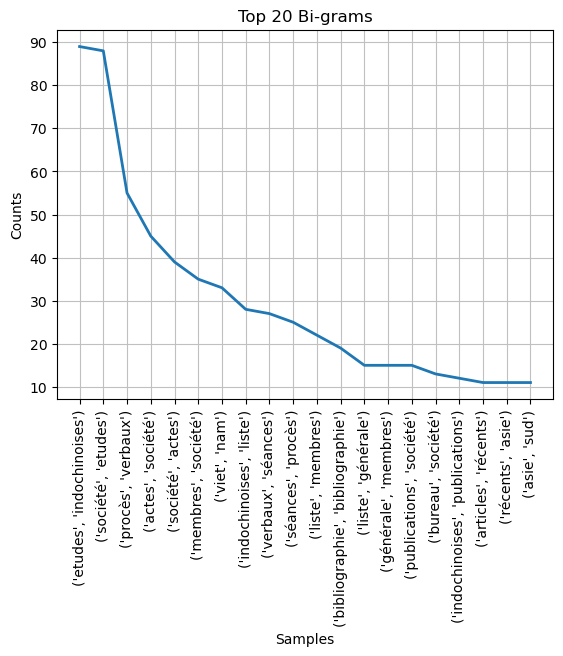

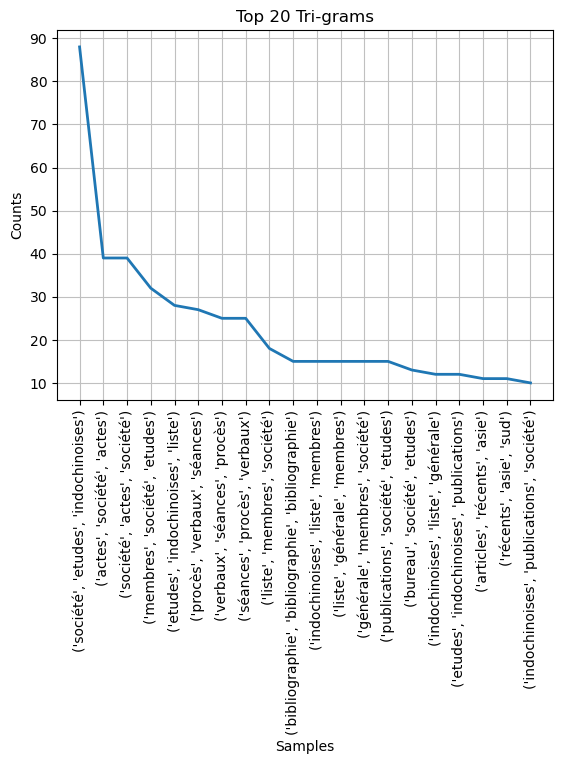

<Axes: title={'center': 'Top 20 Tri-grams'}, xlabel='Samples', ylabel='Counts'>

In [17]:
# Plot frequency distributions
bigram_freq.plot(20, title="Top 20 Bi-grams")
tri_gram_freq = FreqDist(trigrams)
tri_gram_freq.plot(20, title="Top 20 Tri-grams")

In [136]:
from langdetect import detect

fr = 0
vn = 0
en = 0
# Detect the language of the corpus
for i in range(len(corpus)):
    lg = detect(corpus[i])
    if lg=='fr':
        fr = fr + 1
        
    elif lg=='en' :
        en = en + 1
        
    else : # lg=='vn':
        print(lg)
        vn = vn+1

print(fr,vn,en)


908 0 8


In [137]:
facilite_lecture = 0.
for doc in corpus:
    flesch_reading_ease = textstat.flesch_reading_ease(doc)
    facilite_lecture += flesch_reading_ease/len(corpus)
#     gunning_fog = textstat.gunning_fog(corpus)

# Print the readability metrics
print("Flesch Reading Ease Score:", facilite_lecture)

Flesch Reading Ease Score: -3117.1340393012997


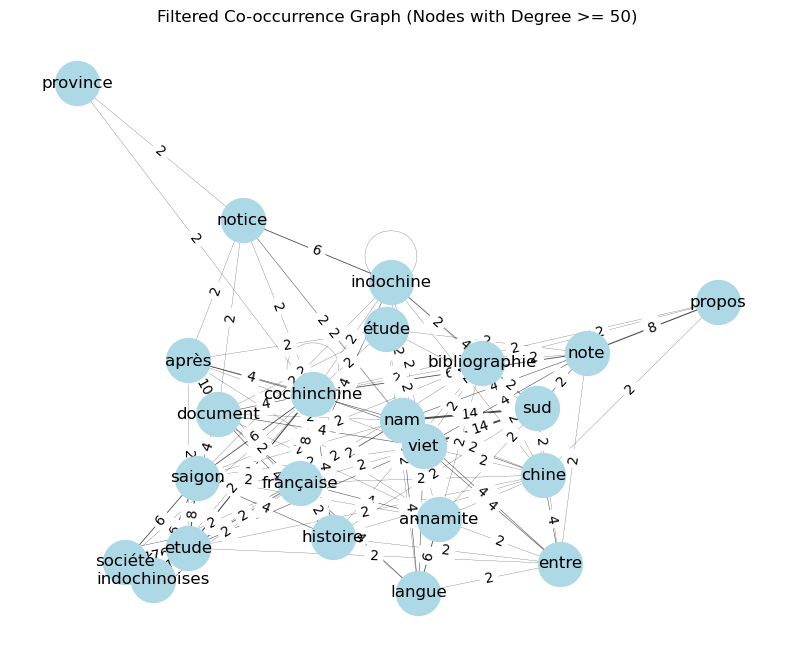

In [66]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt

# Sample corpus (replace with your own text data)
corpus =  preprocessed_title


# Function to check if a token consists only of consonants
def contains_only_consonants(token):
    # Use a regular expression to check if the token contains only consonants (no vowels)
    return bool(re.match(r'^[^aeiouAEIOU]+$', token))

# Tokenize the corpus and preprocess tokens (e.g., removing punctuation and converting to lowercase)
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    # Filter the tokens to remove those consisting only of consonants
    filtered_tokens = [token for token in tokens if not contains_only_consonants(token)]
    return [token.lower() for token in filtered_tokens if token.isalnum()]


tokenized_corpus = [preprocess(text) for text in corpus]

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the tokens
lemmatized_corpus = [[lemmatizer.lemmatize(token) for token in tokens] for tokens in tokenized_corpus]


# Create a co-occurrence graph
G = nx.Graph()

# Define a co-occurrence window (number of words before and after a target word)
window = 5

# Iterate through the tokenized corpus to build co-occurrence relationships
for tokens in lemmatized_corpus:
    for i, target_word in enumerate(tokens):
        for j in range(i - window, i + window + 1):
            if j != i and 0 <= j < len(tokens):
                co_word = tokens[j]
                if G.has_edge(target_word, co_word):
                    G[target_word][co_word]['weight'] += 1
                else:
                    G.add_edge(target_word, co_word, weight=1)

# Filter nodes based on node degree (e.g., keep only nodes with degree >= threshold)
degree_threshold = 50  # Adjust as needed
nodes_to_keep = [node for node in G.nodes() if G.degree[node] >= degree_threshold]

# Create a subgraph with filtered nodes
H = G.subgraph(nodes_to_keep)

# Visualization (you can adjust the layout and appearance)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(H, seed=42)  # Spring layout for visualization
labels = {node: node for node in H.nodes()}
edge_labels = {(u, v): d['weight'] for u, v, d in H.edges(data=True)}
nx.draw_networkx_nodes(H, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_labels(H, pos, labels=labels)
nx.draw_networkx_edges(H, pos, width=[d['weight'] * 0.1 for u, v, d in H.edges(data=True)], alpha=0.7)
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=10)
plt.title("Filtered Co-occurrence Graph (Nodes with Degree >= {})".format(degree_threshold))
plt.axis('off')
plt.show()


In [65]:
lemmatized_corpus

[['vo', 'nguy', 'amiral', 'gialong'],
 ['vocabulaire', 'annamite', 'français'],
 ['vue',
  'ensemble',
  'sculpture',
  'modelage',
  'chine',
  'durant',
  'vingt',
  'siècles'],
 ['vérification',
  'date',
  'inscription',
  'monument',
  'khmer',
  'seconde',
  'partie'],
 ['etude', 'procédés', 'fonderie', 'artisanale', 'viet', 'nam'],
 ['etude', 'monument', 'représentatifs', 'art', 'français', 'saigon'],
 ['etude',
  'phonèmes',
  'vietnamiens',
  'confrontation',
  'entre',
  'vietnamien',
  'dialectes',
  'hauts',
  'plateau',
  'sud',
  'viet',
  'nam'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['actes', 'société'],
 ['ca', 'droit', 'maritime', 'international'],
 ['édicule', 'birman', 'lao'],
 ['enquêt

Poids des bords : dans un graphique de cooccurrence, chaque bord entre deux nœuds (mots) est associé à un poids ou à un nombre qui représente la fréquence à laquelle ces mots coapparaissent dans un contexte spécifique, tel qu'une fenêtre de mots dans un corpus de texte.

Seuil : en définissant un seuil de 50, vous dites essentiellement que vous souhaitez inclure uniquement les arêtes avec un nombre de cooccurrences de 50 ou plus dans le graphique. Les bords avec un nombre inférieur à 50 seront exclus du graphique.

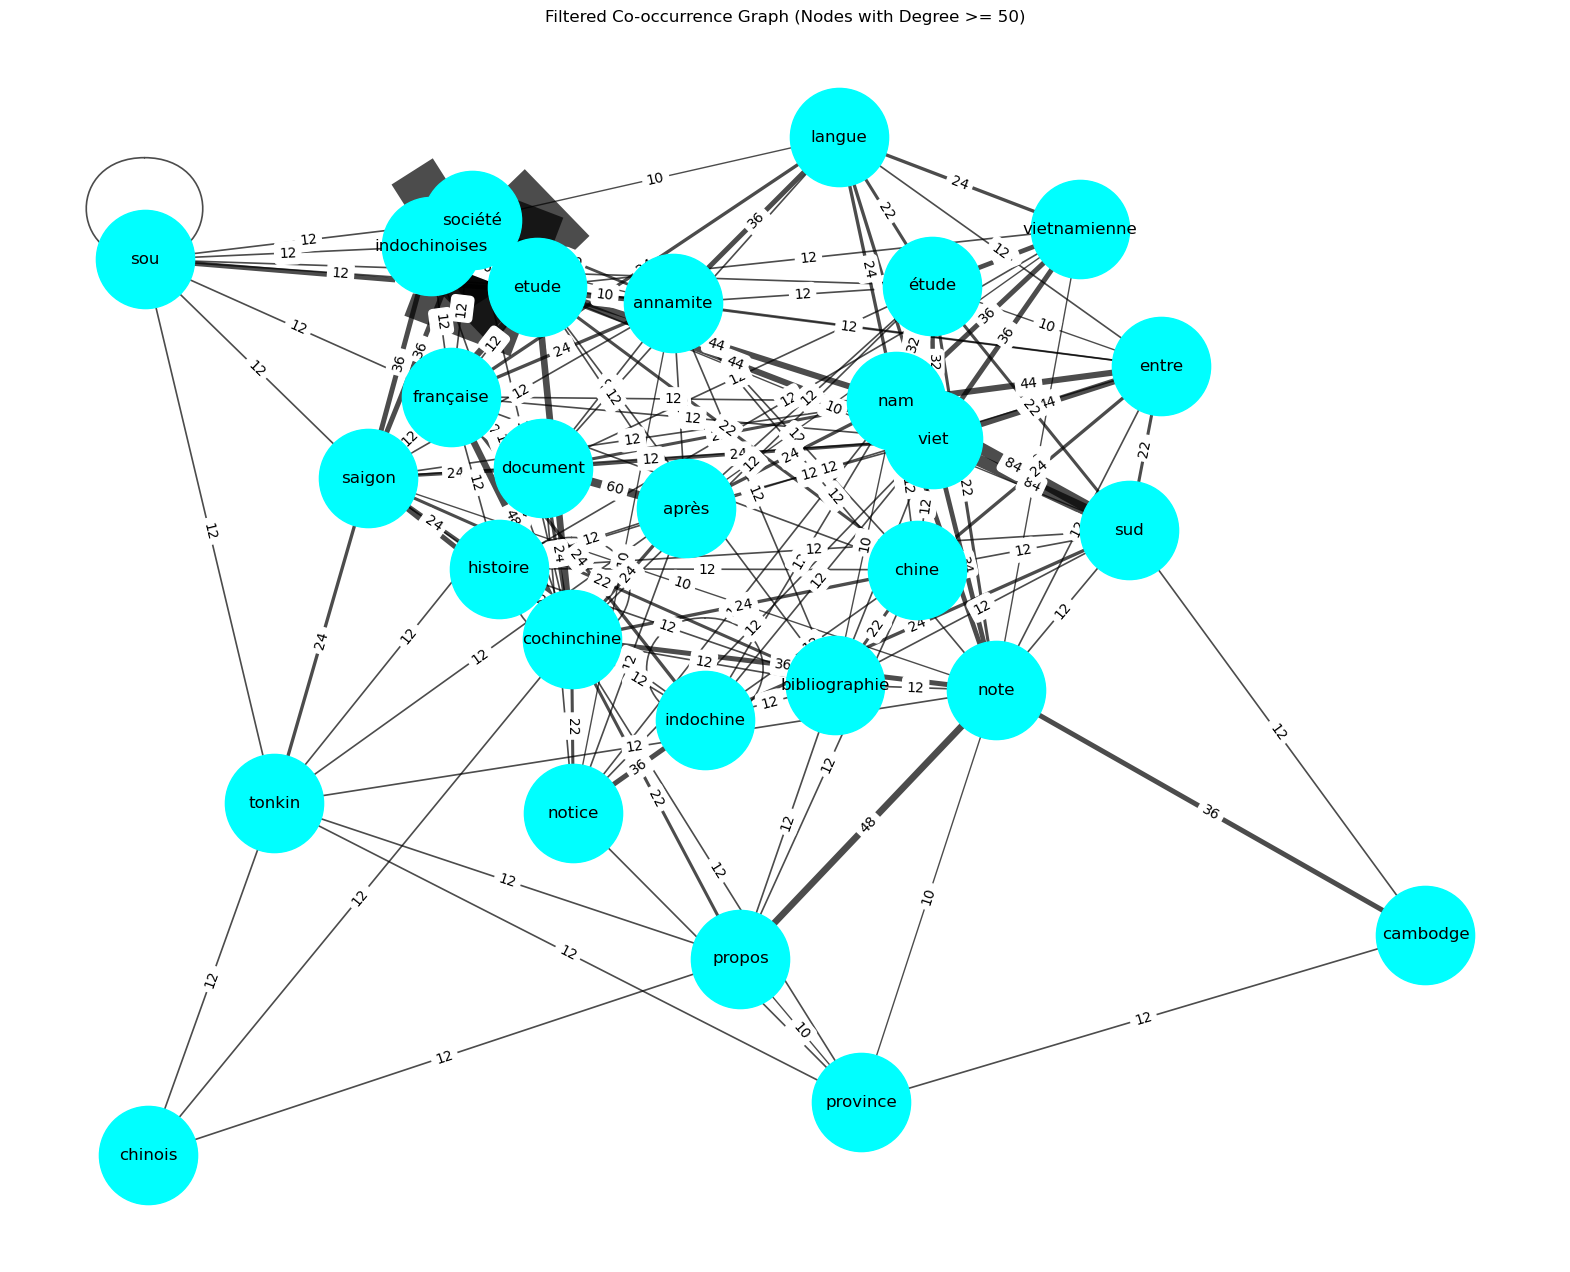

In [71]:

# Define a co-occurrence window (number of words before and after a target word)
window = 20

# Iterate through the tokenized corpus to build co-occurrence relationships
for tokens in lemmatized_corpus:
    for i, target_word in enumerate(tokens):
        for j in range(i - window, i + window + 1):
            if j != i and 0 <= j < len(tokens):
                co_word = tokens[j]
                if G.has_edge(target_word, co_word):
                    G[target_word][co_word]['weight'] += 1
                else:
                    G.add_edge(target_word, co_word, weight=1)

# Filter nodes based on node degree (e.g., keep only nodes with degree >= threshold)
degree_threshold = 50  # Adjust as needed
nodes_to_keep = [node for node in G.nodes() if G.degree[node] >= degree_threshold]

# Create a subgraph with filtered nodes
H = G.subgraph(nodes_to_keep)

# Visualization (you can adjust the layout and appearance)
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(H, seed=42)  # Spring layout for visualization
labels = {node: node for node in H.nodes()}
edge_labels = {(u, v): d['weight'] for u, v, d in H.edges(data=True)}
nx.draw_networkx_nodes(H, pos, node_size=5000, node_color='cyan')
nx.draw_networkx_labels(H, pos, labels=labels)
nx.draw_networkx_edges(H, pos, width=[d['weight'] * 0.1 for u, v, d in H.edges(data=True)], alpha=0.7)
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=10)
plt.title("Filtered Co-occurrence Graph (Nodes with Degree >= {})".format(degree_threshold))
plt.axis('off')
plt.show()